In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import dataset

In [2]:
df = pd.read_csv("../data/vikar_orders.csv")
df.head()

,ID,Pickup_Date,Pickup_Time,DropOff_Date,DropOff_Time,Vehicle,Pickup_Location,DropOff_Location,Name,Email,Phone,Flight_or_Hotel,Age,Driving Area,Total
0,51,07/08/2023,12:00,12/08/2023,12:00,Honda HR/V RS HYBRID 2023,NaN,NaN,Nadiia Malanchii,NaN,6.661916e+10,NaN,35.0,NaN,7000.00
1,52,12/08/2023,14:00,17/08/2023,14:00,Toyota Yaris Ativ 2023,NaN,NaN,Nadiia Malanchii,NaN,6.661916e+10,NaN,NaN,NaN,3500.00
2,53,19/08/2023,14:00,23/08/2023,08:00,Toyota Veloz 2023,Rawai,Rawai,Ankit Nayar,Nayar.ankit@gmail.com,9.199234e+11,"Soi Kokyang, Tambon Rawai, Chang Wat Phuket 83...",35.0,NaN,5080.00
3,54,24/08/2023,11:00,06/09/2023,11:00,Toyota Veloz 2023,Rawai,Rawai,Dawid Śremski,dawid.sremski@icloud.com,4.850402e+10,"12 Soi Yanuy Villa, Tambon Rawai, Chang Wat Ph...",31.0,NaN,13480.00
4,55,22/09/2023,22:00,20/10/2023,19:00,Toyota Yaris Ativ 2023,Phuket Airport,Phuket Airport,Roman Loginov,qwertys40@yandex.ru,3.752592e+11,MU260,42.0,NaN,18920.00


In [3]:
df.shape

(281, 15)

## Data Cleaning

Remove all the features with more than 40% missing values. 

In [4]:
nullFeatures = []
for col in df.columns:
    nullSum = df[col].isnull().sum()
    nullPer = nullSum/df.shape[0]
    if nullPer>0.4:
        print(f"{col}: {nullPer*100:.2f}%")
        nullFeatures.append(col)
print(nullFeatures)

[]


There are no features in the dataset that exceeds the threshold of missing values, hence we omit no colums from the dataset at this stage.

Further, we will remove variables unrelated to the models training, such as ID, Payment Method, and Order Status

In [5]:
df = df.drop(["ID"], axis = 1)
df.head()

,Pickup_Date,Pickup_Time,DropOff_Date,DropOff_Time,Vehicle,Pickup_Location,DropOff_Location,Name,Email,Phone,Flight_or_Hotel,Age,Driving Area,Total
0,07/08/2023,12:00,12/08/2023,12:00,Honda HR/V RS HYBRID 2023,NaN,NaN,Nadiia Malanchii,NaN,6.661916e+10,NaN,35.0,NaN,7000.00
1,12/08/2023,14:00,17/08/2023,14:00,Toyota Yaris Ativ 2023,NaN,NaN,Nadiia Malanchii,NaN,6.661916e+10,NaN,NaN,NaN,3500.00
2,19/08/2023,14:00,23/08/2023,08:00,Toyota Veloz 2023,Rawai,Rawai,Ankit Nayar,Nayar.ankit@gmail.com,9.199234e+11,"Soi Kokyang, Tambon Rawai, Chang Wat Phuket 83...",35.0,NaN,5080.00
3,24/08/2023,11:00,06/09/2023,11:00,Toyota Veloz 2023,Rawai,Rawai,Dawid Śremski,dawid.sremski@icloud.com,4.850402e+10,"12 Soi Yanuy Villa, Tambon Rawai, Chang Wat Ph...",31.0,NaN,13480.00
4,22/09/2023,22:00,20/10/2023,19:00,Toyota Yaris Ativ 2023,Phuket Airport,Phuket Airport,Roman Loginov,qwertys40@yandex.ru,3.752592e+11,MU260,42.0,NaN,18920.00


## Recode Values

Extract information about countries and searching platforms from Phone and Email columns

In [6]:
df_copy = df.copy()
phone_codes = {"880":"BD","258":"MZ","1":"CA/US/UM","20":"EG","211":"SS","212":"EH/MA","213":"DZ","216":"TN","218":"LY","220":"GM","221":"SN","222":"MR","223":"ML","224":"GN","225":"CI","226":"BF","227":"NE","228":"TG","229":"BJ","230":"MU","231":"LR","232":"SL","233":"GH","234":"NG","235":"TD","236":"CF","237":"CM","238":"CV","239":"ST","240":"GQ","241":"GA","242":"CG","243":"CD","244":"AO","245":"GW","246":"IO","248":"SC","249":"SD","250":"RW","251":"ET","252":"SO","253":"DJ","254":"KE","255":"TZ","256":"UG","257":"BI","260":"ZM","261":"MG","262":"RE","262":"YT","263":"ZW","264":"NA","265":"MW","266":"LS","267":"BW","268":"SZ","269":"KM","27":"ZA","290":"SH","291":"ER","297":"AW","298":"FO","299":"GL","30":"GR","31":"NL","32":"BE","33":"FR","34":"ES","350":"GI","351":"PT","352":"LU","353":"IE","354":"IS","355":"AL","356":"MT","357":"CY","358":"FI","359":"BG","36":"HU","370":"LT","371":"LV","372":"EE","373":"MD","374":"AM","375":"BY","376":"AD","377":"MC","378":"SM","379":"VA","380":"UA","381":"RS","382":"ME","385":"HR","386":"SI","387":"BA","389":"MK","39":"IT","40":"RO","41":"CH","420":"CZ","421":"SK","423":"LI","43":"AT","44":"GB","45":"DK","46":"SE","47":"SJ/NO","48":"PL","49":"DE","500":"FK","501":"BZ","502":"GT","503":"SV","504":"HN","505":"NI","506":"CR","507":"PA","508":"PM","509":"HT","51":"PE","52":"MX","53":"CU","54":"AR","55":"BR","56":"CL","57":"CO","58":"VE","590":"BL/GP/MF","591":"BO","592":"GY","593":"EC","594":"GF","595":"PY","596":"MQ","597":"SR","598":"UY","599":"BQ/CW/SX","60":"MY","61":"CC/CX/AU","62":"ID","63":"PH","64":"NZ","65":"SG","66":"TH","670":"TL","672":"NF","673":"BN","674":"NR","675":"PG","676":"TO","677":"SB","678":"VU","679":"FJ","680":"PW","681":"WF","682":"CK","683":"NU","685":"WS","686":"KI","687":"NC","688":"TV","689":"PF","690":"TK","691":"FM","692":"MH","7":"RU/KZ","81":"JP","82":"KR","84":"VN","850":"KP","852":"HK","853":"MO","855":"KH","856":"LA","86":"CN","870":"PN","886":"TW","90":"TR","91":"IN","92":"PK","93":"AF","94":"LK","95":"MM","960":"MV","961":"LB","962":"JO","963":"SY","964":"IQ","965":"KW","966":"SA","967":"YE","968":"OM","970":"PS","971":"AE","972":"IL","973":"BH","974":"QA","975":"BT","976":"MN","977":"NP","98":"IR","992":"TJ","993":"TM","994":"AZ","995":"GE","996":"KG","998":"UZ"}

In [7]:
df_copy["Phone"] = df_copy["Phone"].astype(str)
df_copy['Phone_normalized'] = df_copy['Phone'].str.replace(r'\D', '')
df_copy['Phone_normalized'] = df_copy['Phone_normalized'].str.replace(r'^0+', '')

In [8]:
df_copy['Country_code'] = df_copy['Phone_normalized'].apply(lambda x: x[:3]).astype(str)
df_copy["Country"] = df_copy['Country_code'].map(phone_codes)
df_count_3 = df_copy[df_copy['Country'].notna()]

common_rows = df_copy.merge(df_count_3)
df_copy =df_copy.drop(common_rows.index).reset_index(drop=True)



In [9]:
df_copy['Country_code'] = df_copy['Phone_normalized'].apply(lambda x: x[:2]).astype(str) 
df_copy["Country"] = df_copy['Country_code'].map(phone_codes)
df_count_2 = df_copy[df_copy['Country'].notna()]

common_rows_2 = df_copy.merge(df_count_2)
df_copy =df_copy.drop(common_rows_2.index).reset_index(drop=True)


In [10]:
df_copy['Country_code'] = df_copy['Phone_normalized'].apply(lambda x: x[:1]).astype(str) 
df_copy["Country"] = df_copy['Country_code'].map(phone_codes)
df_count_1 = df_copy[df_copy['Country'].notna()]

common_rows_1 = df_copy.merge(df_count_1)
df_copy =df_copy.drop(common_rows_1.index).reset_index(drop=True)

In [11]:
combined_df = pd.concat([df_count_1, df_count_2, df_count_3, df_copy], axis=0).reset_index(drop=True)

combined_df.shape


(281, 17)

In [12]:
combined_df['Pickup_Date'] = pd.to_datetime(     combined_df['Pickup_Date'], format='%d/%m/%Y')
combined_df['DropOff_Date'] = pd.to_datetime(    combined_df['DropOff_Date'], format='%d/%m/%Y')
combined_df['Pickup_Time'] = pd.to_datetime(     combined_df['Pickup_Time'], format='%H:%M').dt.time
combined_df['DropOff_Time'] = pd.to_datetime(    combined_df['DropOff_Time'], format='%H:%M').dt.time
combined_df['Pickup_Datetime'] = pd.to_datetime( combined_df['Pickup_Date'].astype(str) + ' ' +  combined_df['Pickup_Time'].astype(str))
combined_df['DropOff_Datetime'] = pd.to_datetime(combined_df['DropOff_Date'].astype(str) + ' ' + combined_df['DropOff_Time'].astype(str))
combined_df['Rental_Duration'] =       combined_df['DropOff_Datetime'] - combined_df['Pickup_Datetime']
combined_df['Rental_Duration_Days'] =  combined_df['Rental_Duration'].dt.days

In [13]:
df = combined_df.drop(["Name","Phone", "Email", "Flight_or_Hotel", "Phone_normalized", "Country_code", 'Pickup_Datetime', 'DropOff_Datetime','Rental_Duration'], axis = 1)
df["Age"] = df["Age"].astype(float)
df["Total"] = df["Total"].astype(float)
df.head()

,Pickup_Date,Pickup_Time,DropOff_Date,DropOff_Time,Vehicle,Pickup_Location,DropOff_Location,Age,Driving Area,Total,Country,Rental_Duration_Days
0,2024-04-11,12:00:00,2024-04-16,18:00:00,Toyota Yaris Hatchback 2022,Mai Khao,Mai Khao,39.0,Phuket only,6520.0,RU/KZ,5
1,2024-03-27,10:00:00,2024-04-02,10:00:00,Toyota Yaris Ativ 2023,Bangtao,Phuket Airport,NaN,NaN,7620.0,RU/KZ,6
2,2024-03-22,22:30:00,2024-03-30,12:00:00,Toyota Yaris Ativ 2023,Phuket Airport,Phuket Airport,40.0,Phuket only,8300.0,RU/KZ,7
3,2024-03-23,09:00:00,2024-03-25,18:00:00,Toyota Yaris Ativ 2023,Kata,Kata,56.0,Phuket only,4360.0,RU/KZ,2
4,2024-06-29,18:20:00,2024-07-31,06:00:00,Toyota Veloz 2023,Phuket Airport,Phuket Airport,47.0,Phuket only,29420.0,RU/KZ,31


## Handling null Values

All null values for categorical attributes would be renamed as "Unknown"

In [14]:
categorical = df.select_dtypes("object")
null_count_cat = categorical.isnull().sum()
print(null_count_cat[null_count_cat > 0])

Pickup_Location     13
DropOff_Location    13
Driving Area        72
Country             72
dtype: int64


In [15]:
categorical = categorical.fillna("Unknown")
categorical.isnull().sum()

Pickup_Time         0
DropOff_Time        0
Vehicle             0
Pickup_Location     0
DropOff_Location    0
Driving Area        0
Country             0
dtype: int64

In [16]:
df = df.drop(categorical, axis=1)
null_count_num = df.isnull().sum()

print(null_count_num[null_count_num > 0])

Age    40
dtype: int64


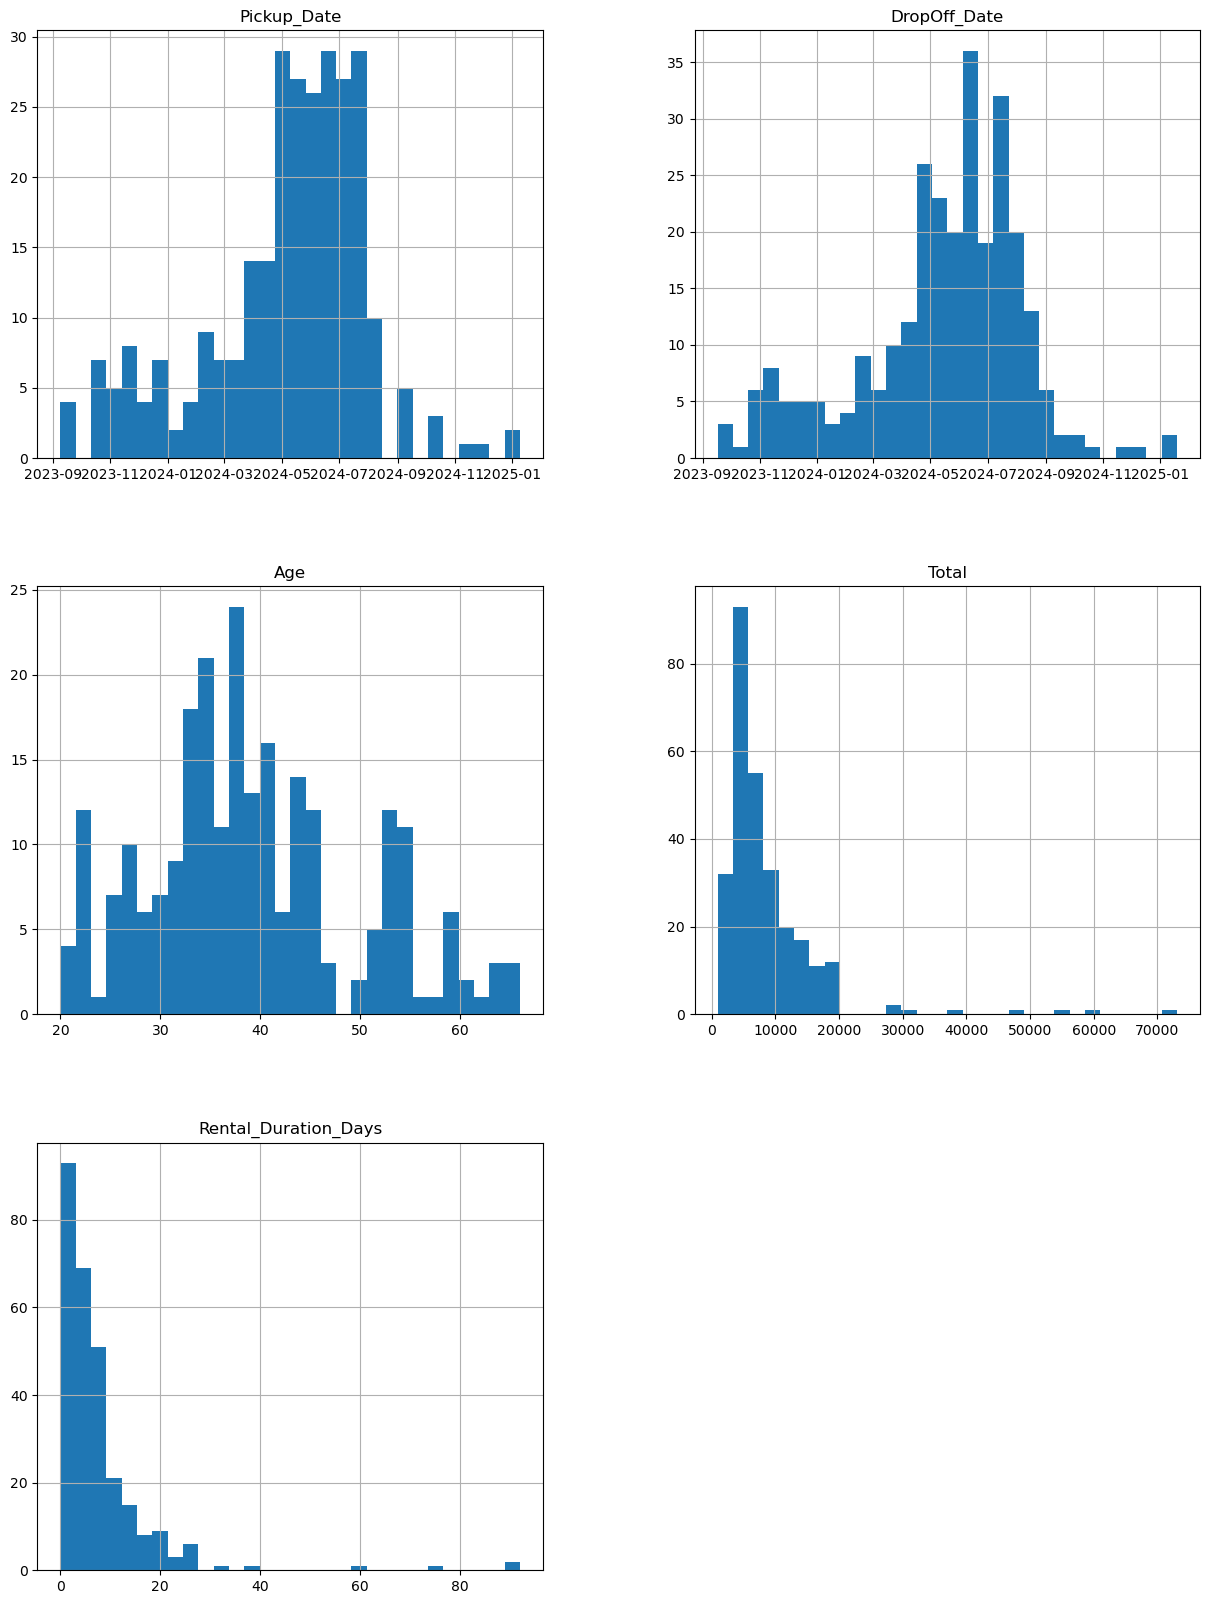

In [17]:
df.hist(figsize=(15, 20), bins=30)
plt.show()

In [18]:
df = df.fillna(df.median())
null_count_num = df.isnull().sum()
print(null_count_num[null_count_num > 0])

Series([], dtype: int64)


Now encode categorical variables with Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical.columns:
    categorical[col] = label_encoder.fit_transform(categorical[col])
 
categorical.head()

,Pickup_Time,DropOff_Time,Vehicle,Pickup_Location,DropOff_Location,Driving Area,Country
0,15,27,4,5,5,0,25
1,9,13,3,0,11,1,25
2,36,17,3,11,11,0,25
3,7,27,3,4,4,0,25
4,28,3,1,11,11,0,25


In [20]:
df = df.join(categorical)
df.shape

(281, 12)

In [21]:
# save dataset that is ready for model training
df.to_csv('../data/vikar_preprocessed.csv',index=False)